<a href="https://colab.research.google.com/github/krnvz/server_client/blob/main/client/Client.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# `CLAUDIO PINCHEIRA ROZAS`

![CLIENT](https://i.ibb.co/hmDCkBT/client.png)

El siguiente colab no necesita conectarse a Drive, ya que utiliza el almacenamiento local temporal otorgado por Google a la respectiva sesión. 

Para el correcto funcionamiento del scrip, se debe actualizar la URL en la variable `base_url`, cada vez que se ejecute nuevamente el colab [Server.ipynb](https://colab.research.google.com/drive/11v7WtxDFdbTfrxTbBKytvHd30KxAyoHi?usp=sharing) y este genere una nuevo link temporal.

### Inicializaciones

In [1]:
#@title Instalación de paquetes y librerias
%%capture
!pip install opencv-python tensorflow
!pip install cvlib
!pip install uvicorn
!pip install fastapi
!pip install python-multipart
!pip install nest-asyncio
!pip install Pillow
!pip install fastapi nest-asyncio pyngrok uvicorn
!pip install colabcode
## Librerias
import os
import io
import cv2
import requests
import numpy as np
from IPython.display import Image, display

In [2]:
#@title Obtener carpera con imagenes de prueba
!wget -cq https://www.dropbox.com/s/cg6iba18j2xr7gx/images.zip

!unzip -qq images.zip

### Detectar objetos en imágenes

Mediante la URL resultante en el colab del servidor, se definirá el *punto* de acceso al detector de objetos, utilizando las funciones `response_from_server` y `display_image_from_response`.

In [4]:
base_url = 'https://f8f4-35-229-102-127.ngrok.io' ## ==> ACTUALIZAR!! esta url cambia cada vez que se ejecuta el server
endpoint = '/predict'
model = 'yolov3-tiny'
confianza = '0.5'

In [5]:
url_with_endpoint_no_params = base_url + endpoint
url_with_endpoint_no_params

'https://f8f4-35-229-102-127.ngrok.io/predict'

In [6]:
full_url = url_with_endpoint_no_params + '?confidence=' + confianza + "&model=" + model
full_url

'https://f8f4-35-229-102-127.ngrok.io/predict?confidence=0.5&model=yolov3-tiny'

Función para solicitar al servidor 

`response_from_server`

In [7]:
def response_from_server(url, image_file, verbose=True):
    """Hace una solicitud POST al servidor y retorna la respuesta.

    Argumentos:
        url (str): URL a la que se envía la consulta.
        image_file (_io.BufferedReader): Archivo a subir, debe ser una imagen.
        verbose (bool): True si se debe imprimir el estado de la solicitud. False en otro caso.

    Retorna:
        requests.models.Response: Respuesta del servidor.
    """
    
    files = {'file': image_file}
    response = requests.post(url, files=files)
    status_code = response.status_code
    if verbose:
        msg = "¡Todo funcionó bien!" if status_code == 200 else "Hubo un error al ejecutar la solicitud."
        print(msg)
    return response

In [8]:
with open("/content/images/clock2.jpg", "rb") as image_file:
    prediction = response_from_server(full_url, image_file)

¡Todo funcionó bien!


In [9]:
dir_name = "images_predicted"
location_imagen_predicted = f"/content/{dir_name}" 
if not os.path.exists(location_imagen_predicted):
    os.mkdir(location_imagen_predicted)

In [10]:
def display_image_from_response(response):
    """Despliega la imagen de la respuesta del servidor.

    Argumentos:
        response (requests.models.Response): La respuesta del servidor luego de la detección de objetos
    """
    
    image_stream = io.BytesIO(response.content)
    image_stream.seek(0)
    file_bytes = np.asarray(bytearray(image_stream.read()), dtype=np.uint8)
    image = cv2.imdecode(file_bytes, cv2.IMREAD_COLOR)
    filename = "image_with_objects.jpeg"
    cv2.imwrite(f'/content/images_predicted/{filename}', image)
    display(Image(f'/content/images_predicted/{filename}'))

#### Test 1: 
Se usan diferentes umbrales de confianza para la detección de objetos 

confidence ∈ `[0.2, 0.4, 0.6, 0.8]`


Nivel de confianza: 0.2


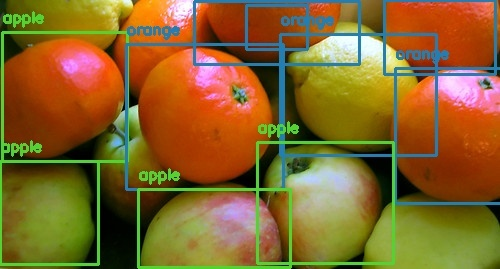


Nivel de confianza: 0.4


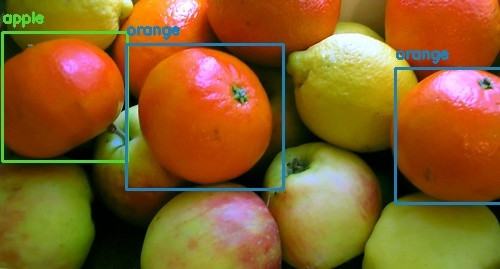


Nivel de confianza: 0.6


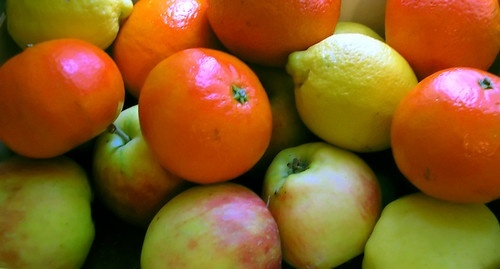


Nivel de confianza: 0.8


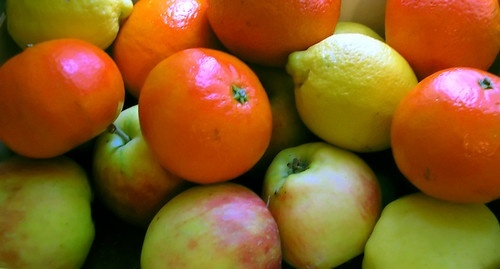

In [11]:
images_fruits = '/content/images/fruits.jpg'
for c in [0.2, 0.4, 0.6, 0.8]:
  full_url = url_with_endpoint_no_params + '?confidence=' + str(c) + "&model=" + model
  with open(images_fruits, "rb") as image_file:
    prediction = response_from_server(full_url, image_file, verbose=False)
  print('\nNivel de confianza: {}'.format(c))
  display_image_from_response(prediction)

#### Test 2: 


Nivel de confianza: 0.2


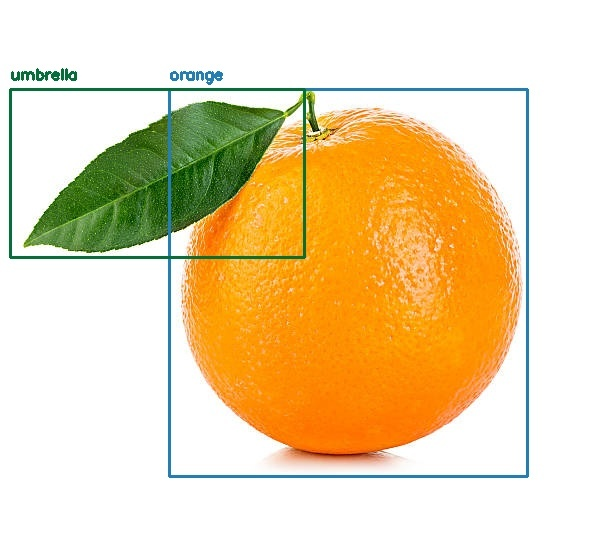


Nivel de confianza: 0.4


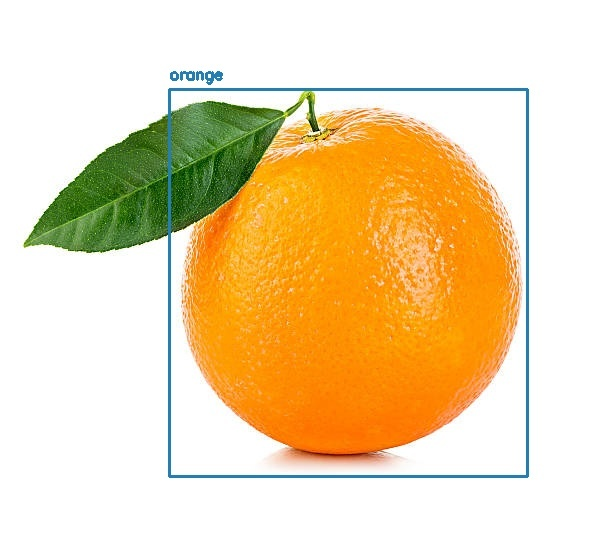


Nivel de confianza: 0.6


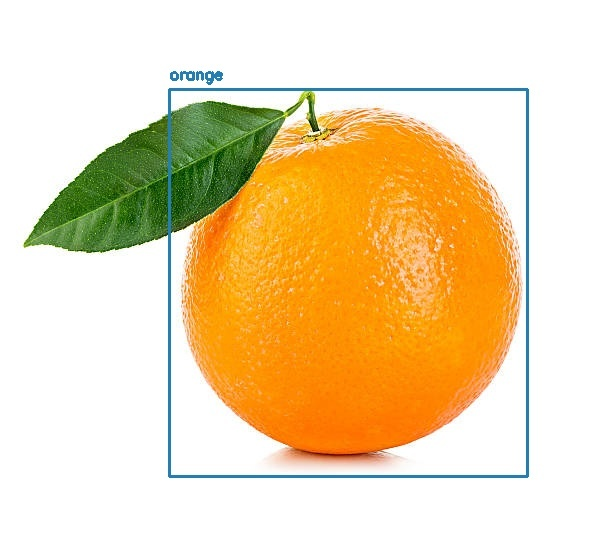


Nivel de confianza: 0.8


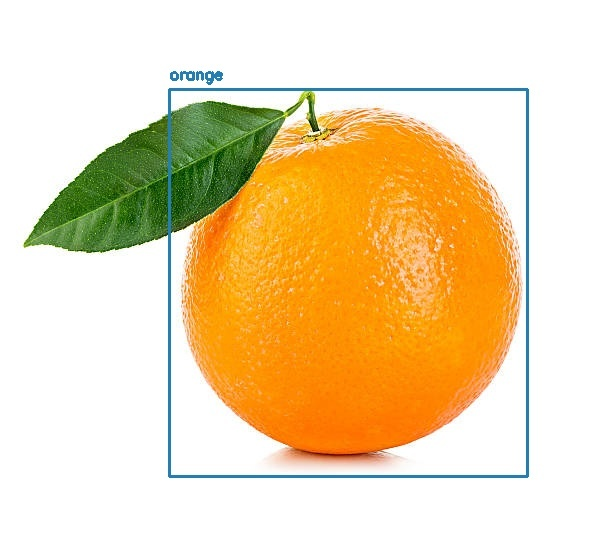

In [12]:
images_fruits = '/content/images/kinnow.jpeg'
for c in [0.2, 0.4, 0.6, 0.8]:
  full_url = url_with_endpoint_no_params + '?confidence=' + str(c) + "&model=" + model
  with open(images_fruits, "rb") as image_file:
    prediction = response_from_server(full_url, image_file, verbose=False)
  print('\nNivel de confianza: {}'.format(c))
  display_image_from_response(prediction)

### Contador de objetos en imágenes

In [13]:
endpoint_ = '/countObjects'
model = 'yolov3-tiny'
confianza = '0.5'
objeto = 'orange'

In [14]:
url_with_endpoint_no_params_ = base_url + endpoint_
url_with_endpoint_no_params_

'https://f8f4-35-229-102-127.ngrok.io/countObjects'

In [15]:
full_url_ = url_with_endpoint_no_params_ + '?Objects='+ objeto +'&confidence=' + confianza + "&model=" + model
full_url_

'https://f8f4-35-229-102-127.ngrok.io/countObjects?Objects=orange&confidence=0.5&model=yolov3-tiny'

#### Test 3:

Contar la cantidad de narangas en la imagen fruits.jpeg

In [16]:
with open("/content/images/fruits.jpg", "rb") as image_file:
    prediction_ = response_from_server(full_url_, image_file, verbose = False)
prediction_.content.decode("utf-8")

'"Con un nivel de confianza de 0.5, se predice que en la imagen fruits.jpg aparece 2 veces el objeto orange"'